In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../experiments")


from experiment_information import *
from experiment_setup import *
from data import *
from helpers import *
from data_loading import *
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


import numpy as np
import re
%load_ext autoreload
%autoreload 2



This code assumes that you have defined and run an experiment before using `define_experiment.ipynb` in the `experiments` folder.

In [2]:
df_experiments, df_state_evolution, df_erm = obtain_dataframes(logger)
df_experiments.head(10)

Current code version, 113


,experiment_id,experiment_name,duration,problem_types,code_version,date,state_evolution_repetitions,erm_repetitions,alphas,epsilons,...,taus,ps,dp,d,experiment_type,completed,data_model_types,data_model_names,data_model_descriptions,gamma_fair_error
20,c12456a0-e57d-4c17-ade3-37f159fe2067,DefenceSweep,244.930682,"[""Logistic""]",113,2024-06-16 13:47:50,1,10,"[0.1585, 0.2154, 0.2929, 0.3981, 0.5412, 0.735...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingIdentit...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
19,f51f85db-dd34-41b0-88f7-ffb7d9319a56,SweepAtOptimalLambda,2.700654,"[""Logistic""]",113,2024-06-16 11:06:18,1,0,"[4.0, 4.0953, 4.193, 4.2929, 4.3952, 4.5]","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel""]","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
18,e4867884-a4c7-4600-b9c8-d3c1ce61c60f,DefenceSweep,27.567360,"[""Logistic""]",113,2024-06-16 11:05:43,1,0,"[0.631, 0.8031, 1.0222, 1.301, 1.656, 2.1077, ...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingIdentit...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
17,d11138a9-15f1-41ce-b54c-6c07730e196d,FeatureComparisonsTest,323.712093,"[""Logistic""]",113,2024-06-16 11:04:38,1,10,"[0.631, 0.8031, 1.0222, 1.301, 1.656, 2.1077, ...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
16,3dd9fbf7-ac92-44de-bf13-cd527cb9e224,PowerLawData,85.791196,"[""Logistic""]",113,2024-06-16 10:58:44,1,0,"[0.3162, 0.508, 0.8161, 1.3111, 2.1063, 3.3839...","[0.0, 0.1, 0.2, 0.3]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_PowerLaw_Coefficient_3.5___Po...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
15,5f83e550-a4d0-4356-beea-0b8c23dd0868,PowerLawBetaSweep,47.375545,"[""Logistic""]",113,2024-06-16 10:41:07,1,0,[3162.2777],"[0.0, 0.1, 0.2]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_PowerLaw_Coefficient_1.01___P...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
14,6e07e0a4-7f5f-45f2-b97a-f1642b3d9608,Defence Sweep,145.607278,"[""Logistic""]",113,2024-06-15 20:02:28,1,10,"[0.1585, 0.2512, 0.3981, 0.631, 1.0, 1.5849, 2...","[0.0, 0.1]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingIdentit...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
13,5c2a6b62-8e95-4eb8-a28c-8d34415ab9e5,Defence Sweep,12.691308,"[""Logistic""]",113,2024-06-15 12:35:10,1,0,"[0.1585, 0.3244, 0.6641, 1.3594, 2.7826, 5.695...","[0.0, 0.1]",...,[0.05],null,0.01,500,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingIdentit...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
12,59061fa3-db63-41b2-962d-ccc7b593c483,SweepRobustnessUsefulFeatures,1328.842367,"[""Logistic""]",113,2024-05-18 14:40:05,1,0,"[100.0, 1000.0, 10000.0]","[0.0, 0.001, 0.01, 0.2]",...,"[0.05, 0.1]",null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""AA_KFeaturesModel_TwoFeatures_ProtectingSeco...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
11,ca4b8bda-a4a2-43d7-b9ed-2a48ae378306,SweepRobustnessUsefulFeatures,15488.394190,"[""Logistic""]",113,2024-05-15 22:53:04,1,0,"[100.0, 1000.0, 10000.0]","[0.0, 0.001, 0.01, 0.2]",...,"[0.05, 0.1]",null,0.01,1000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""AA_KFeaturesModel_TwoFeatures_ProtectingSeco...","[""2 Features, 

In [3]:
experiment_loc = 4

# extract and print the top experiment_id
experiment_id = df_experiments.iloc[experiment_loc]["experiment_id"]
print(experiment_id)

# extract and print the experiment type
experiment_type = df_experiments.iloc[experiment_loc]["experiment_type"]
print(experiment_type)

# extract and print the data model type and data_model name used
data_model_types = df_experiments.iloc[experiment_loc]["data_model_types"]
# convert it to the enum
data_model_types = [DataModelType[data_model_type] for data_model_type in json.loads(data_model_types)]
data_model_names = [name for name in json.loads(df_experiments.iloc[experiment_loc]["data_model_names"])]
data_model_descriptions = df_experiments.iloc[experiment_loc]["data_model_descriptions"]
for data_model_type in data_model_types:
    print(data_model_type.name)
print(data_model_names)
print(data_model_descriptions)

# print the experiment name
experiment_name = df_experiments.iloc[experiment_loc]["experiment_name"]
print(experiment_name)

# print the experiment problem types
experiment_problem_types = df_experiments.iloc[experiment_loc]["problem_types"]
experiment_problem_types = json.loads(experiment_problem_types)
print(experiment_problem_types)

3dd9fbf7-ac92-44de-bf13-cd527cb9e224
Sweep
KFeaturesModel
KFeaturesModel
KFeaturesModel
KFeaturesModel
['KFeaturesModel_PowerLaw_Coefficient_3.5___PowerLawData', 'KFeaturesModel_PowerLaw_Coefficient_2.5___PowerLawData', 'KFeaturesModel_PowerLaw_Coefficient_1.5___PowerLawData', 'KFeaturesModel_PowerLaw_Coefficient_0.5___PowerLawData']
["2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity", "2 Features, Theta Identity, Sigma_upsilon Identity, Sigma_delta Identity"]
PowerLawData
['Logistic']


In [4]:
data_model_name_dict = {}
data_model_name_dict["VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["2_VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["VanillaGaussianThetaFirst"] = "Vanilla Gaussian - Teacher 10:1"
data_model_name_dict["VanillaGaussianTimes10"] = "Vanilla Gaussian x10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[10  1]"] = "Strong Weak 5:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[10  1]"] = "Strong Weak 10:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[ 1 10]"] = "Strong Weak 5:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[ 1 10]"] = "Strong Weak 10:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1"] = "Robust Non-Useful"

data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[2 2]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[4 4]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[0.5 0.5]_SD_1_1_SU_1_1"] = "Robust Non-Useful"


data_model_name_dict['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[2 2]_SD_1_1_SU_1_1'] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[8 8]_SD_1_1_SU_1_1"] = "Non-Robust Useful"


data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[2.  0.5]_[1 1]_SD_1_1_SU_1_1"] = "Invariant Defence"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingFirstStronger_AttackingIdentity_[0.5 0.5]_[2.  0.5]_[1 1]_SD_2_1_SU_1_1"] = "Protecting Robust"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2.  0.5]_[1 1]_SD_1_2_SU_1_1"] = "Protecting Non-Robust"


data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5.  0.2]_[1 1]_SD_1_1_SU_1_1"] = "Invariant Defence"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingFirstStronger_AttackingIdentity_[0.5 0.5]_[5.  0.2]_[1 1]_SD_2_1_SU_1_1"] = "Protecting Robust"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5.  0.2]_[1 1]_SD_1_2_SU_1_1"] = "Protecting Non-Robust"

In [5]:
state_evolution = df_state_evolution[df_state_evolution["experiment_id" ] == experiment_id]
gd = df_erm[df_erm["experiment_id" ] == experiment_id]
# make the column subspace_overlaps to string
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))

# create a json colum
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: json.loads(x))
from pandas import json_normalize
# normalize the json column
normalized = json_normalize(state_evolution["subspace_overlaps"])
normalized_gd = json_normalize(gd["subspace_overlaps"])



def explode_array_column(row, col):
    return pd.Series(row[col])

# reset the index of the original dataframe
state_evolution = state_evolution.reset_index(drop=True)
gd = gd.reset_index(drop=True)

for col in normalized.columns:
    expanded_cols = normalized.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)
    state_evolution = pd.concat([state_evolution, expanded_cols], axis=1)

for col in normalized_gd.columns:
    expanded_cols = normalized_gd.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)

    gd = pd.concat([gd, expanded_cols], axis=1)



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_16840/3541688095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_16840/3541688095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))


In [6]:
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: str(x))
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(state_evolution["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
state_evolution = pd.concat([state_evolution, normalized], axis=1)
# drop the original subspace_overlaps column
state_evolution = state_evolution.drop(columns=["subspace_overlaps_ratio"])

gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: str(x))
gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(gd["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
gd = pd.concat([gd, normalized], axis=1)
# drop the original subspace_overlaps column
gd = gd.drop(columns=["subspace_overlaps_ratio"])


In [7]:
# def compute_mu_usefulness(row):
#     rho = row["rho"]
#     tau = row["tau"]

#     rho = float(rho)
#     tau = float(tau)

#     return np.sqrt(2 / np.pi) * rho / np.sqrt( rho + tau**2 )

# def compute_gamma_robustness(row):
#     rho = row["rho"]
#     tau = row["tau"]


#     rho = float(rho)
#     tau = float(tau)

#     return np.sqrt(2 / np.pi) * tau / np.sqrt( rho + tau**2 )

# def compute_mu_usefulness_ratio(row):

In [8]:
# create a column for the difference between the adversarial_generalization_error and the generalization_error for both the state evolution and the erm
state_evolution["difference_adv_gen"] = state_evolution["adversarial_generalization_error"] - state_evolution["generalization_error"]
gd["difference_adv_gen"] = gd["adversarial_generalization_error"] - gd["generalization_error_erm"]


state_evolution["ratio_adv_gen"] = state_evolution["adversarial_generalization_error"] / state_evolution["generalization_error"]
gd["ratio_adv_gen"] = gd["adversarial_generalization_error"] / gd["generalization_error_erm"]

In [9]:
# create a column for the noise contribution
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

state_evolution["noise_contribution"] = state_evolution.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)
gd["noise_contribution"] = gd.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)

In [10]:
# create a column for the noiseless generalization error without the noise contribution
state_evolution["noiseless_generalization_error"] = state_evolution["generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_generalization_error_erm"] = gd["generalization_error_erm"] - gd["noise_contribution"]

# create a column for the adversarial noiseless generalization error without the noise contribution
state_evolution["noiseless_adversarial_generalization_error"] = state_evolution["adversarial_generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_adversarial_generalization_error"] = gd["adversarial_generalization_error"] - gd["noise_contribution"]

In [11]:
def noiseless_angle_to_generalisation(angle):
    return np.arccos(angle) / np.pi

state_evolution["noiseless_angle_to_generalisation"] = state_evolution.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)
gd["noiseless_angle_to_generalisation"] = gd.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)

In [12]:
# create a column for the A/sqrt(q*N) for both the state evolution and the erm
state_evolution["A_over_sqrt_qN"] = state_evolution["A"] / np.sqrt(state_evolution["q"] * state_evolution["N"])
gd["A_over_sqrt_qN"] = gd["A"] / np.sqrt(gd["q"] * gd["N"])

In [13]:
# create a column for m/sqrt( rho*q - m**2 ) vs A/sqrt(q*N) for both the state evolution and the erm
state_evolution["m_over_sqrt_rhoq_minus_m2"] = state_evolution["m"] / np.sqrt(state_evolution["rho"] * state_evolution["q"] - state_evolution["m"]**2)
gd["m_over_sqrt_rhoq_minus_m2"] = gd["m"] / np.sqrt(gd["rho"] * gd["q"] - gd["m"]**2)

In [14]:
# strip the data_model_name if there is a sequence ___text at the end
def strip_data_model_name(data_model_name):
    return re.sub(r"___.*","",data_model_name)
state_evolution["data_model_name"] = state_evolution["data_model_name"].apply(strip_data_model_name)
gd["data_model_name"] = gd["data_model_name"].apply(strip_data_model_name)

In [15]:
gd = gd.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","data_model_name"]) #,"p_calibration"
state_evolution = state_evolution.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","data_model_name"]) #,"p_calibration"

# drop id, code_version, experiment_id, date, initial_condition, test_against_epsilons, calibrations, abs_tol, min_iter,max_iter,blend_fpe,int_lims,subspace_overlaps
state_evolution = state_evolution.drop(columns=["id","code_version","experiment_id","date","initial_condition","test_against_epsilons","calibrations","abs_tol","min_iter","max_iter","blend_fpe","int_lims","subspace_overlaps","data_model_type","data_model_description"])
# drop id, code_version, experiment_id, test_against_epsilons, date, subspace_overlaps, analytical_calibrations, erm_calibrations, 
gd = gd.drop(columns=["id","code_version","experiment_id","test_against_epsilons","date","subspace_overlaps","analytical_calibrations","erm_calibrations","data_model_type","data_model_description"])

state_evolution.columns = [col+"_state_evolution" for col in state_evolution.columns]
gd.columns = [col+"_erm" for col in gd.columns]

state_evolution = state_evolution.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
gd = gd.groupby(level=[0,1,2,3,4,5,6]).agg(["mean","std"]) #,4
df = state_evolution.join(gd, how="outer")
df.sort_index()
df

index_state_evolution  \
                                                                                                                  mean   
alpha     epsilon tau  lam   problem_type attack_epsilon data_model_name                                                 
0.3162    0.0     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5               57815.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5               57742.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5               57671.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5               57616.0   
          0.1     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5               57817.0   
...                                                                                                                ...   
1000.0000 0.2     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_3.5               57697.0   
          0.3     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5               57887.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5               57822.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5               57767.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5               57691.0   

                                                                                                      \
                                                                                                 std   
alpha     epsilon tau  lam   problem_type attack_epsilon data_model_name                               
0.3162    0.0     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5 NaN   
          0.1     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5 NaN   
...                                                                                               ..   
1000.0000 0.2     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_3.5 NaN   
          0.3     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5 NaN   

                                                                                                 duration_state_evolution  \
                                                                                                                     mean   
alpha     epsilon tau  lam   problem_type attack_epsilon data_model_name                                                    
0.3162    0.0     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5                 0.055494   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5                 0.136615   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5                 1.067858   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5                 3.537863   
          0.1     0.05 0.001 Logistic     0.1           

In [16]:
# extract unique data_model_name from index
data_model_names = df.index.get_level_values("data_model_name").unique()
data_model_names

Index(['KFeaturesModel_PowerLaw_Coefficient_0.5',
       'KFeaturesModel_PowerLaw_Coefficient_1.5',
       'KFeaturesModel_PowerLaw_Coefficient_2.5',
       'KFeaturesModel_PowerLaw_Coefficient_3.5'],
      dtype='object', name='data_model_name')

In [17]:
# store the dataframe as a pickle file
if not os.path.exists("Pickles"):
    os.makedirs("Pickles")
if not os.path.exists("Pickles/powerlaw.pkl"):
    df.to_pickle("Pickles/powerlaw.pkl")

In [18]:
# load the dataframe from the pickle file
# df = pd.read_pickle("Pickles/powerlaw.pkl")

In [19]:
df

index_state_evolution  \
                                                                                                                  mean   
alpha     epsilon tau  lam   problem_type attack_epsilon data_model_name                                                 
0.3162    0.0     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5               57815.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5               57742.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5               57671.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5               57616.0   
          0.1     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5               57817.0   
...                                                                                                                ...   
1000.0000 0.2     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_3.5               57697.0   
          0.3     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5               57887.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5               57822.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5               57767.0   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5               57691.0   

                                                                                                      \
                                                                                                 std   
alpha     epsilon tau  lam   problem_type attack_epsilon data_model_name                               
0.3162    0.0     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5 NaN   
          0.1     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5 NaN   
...                                                                                               ..   
1000.0000 0.2     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_3.5 NaN   
          0.3     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5 NaN   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5 NaN   

                                                                                                 duration_state_evolution  \
                                                                                                                     mean   
alpha     epsilon tau  lam   problem_type attack_epsilon data_model_name                                                    
0.3162    0.0     0.05 0.001 Logistic     0.1            KFeaturesModel_PowerLaw_Coefficient_0.5                 0.055494   
                                                         KFeaturesModel_PowerLaw_Coefficient_1.5                 0.136615   
                                                         KFeaturesModel_PowerLaw_Coefficient_2.5                 1.067858   
                                                         KFeaturesModel_PowerLaw_Coefficient_3.5                 3.537863   
          0.1     0.05 0.001 Logistic     0.1           

# Extracting Data

In [20]:
# extract unique epsilons
epsilons = df.index.get_level_values("epsilon").unique()
epsilons

Index([0.0, 0.1, 0.2, 0.3], dtype='float64', name='epsilon')

In [22]:
# keep only attack_epsilon = 0.2
df = df.xs(0.1, level="attack_epsilon")

In [23]:
data_model_names = df.index.get_level_values("data_model_name").unique()
data_model_names

Index(['KFeaturesModel_PowerLaw_Coefficient_0.5',
       'KFeaturesModel_PowerLaw_Coefficient_1.5',
       'KFeaturesModel_PowerLaw_Coefficient_2.5',
       'KFeaturesModel_PowerLaw_Coefficient_3.5'],
      dtype='object', name='data_model_name')

In [24]:
# create a dictionary of dataframes for each data_model_name
df_dict = {}
for data_model_name in data_model_names:

    # the data_model_name is given by a string of this form 'KFeaturesModel_PowerLaw_Coefficient_3.5'
    # we want to extract the coefficient
    # split the string by '_'
    split = data_model_name.split("_")
    # extract the coefficient
    beta = split[-1]
    # convert the beta to a float
    beta = float(beta)

    


    df_data_model = df.xs(data_model_name, level="data_model_name")

    # for each data_model_name, create a dictionary
    eps_dict = {}

    for epsilon in epsilons:


        eps_df = df_data_model.xs(epsilon, level="epsilon")

        alphas = eps_df.index.get_level_values("alpha").unique()
        adversarial_error_0 = eps_df["adversarial_generalization_error_state_evolution"]["mean"].values
        generalization_error_0 = eps_df["generalization_error_state_evolution"]["mean"].values
        boundary_error_0 = eps_df["difference_adv_gen_state_evolution"]["mean"].values
        class_preserving = eps_df["fair_adversarial_error_state_evolution"]["mean"].values

        adversarial_error_erm = eps_df["adversarial_generalization_error_erm"]["mean"].values
        generalization_error_erm = eps_df["generalization_error_erm_erm"]["mean"].values
        boundary_error_erm = eps_df["difference_adv_gen_erm"]["mean"].values
        class_preserving_erm = eps_df["fair_adversarial_error_erm"]["mean"].values

        adversarial_error_erm_std = eps_df["adversarial_generalization_error_erm"]["std"].values
        generalization_error_erm_std = eps_df["generalization_error_erm_erm"]["std"].values
        boundary_error_erm_std = eps_df["difference_adv_gen_erm"]["std"].values
        class_preserving_erm_std = eps_df["fair_adversarial_error_erm"]["std"].values

        alphas = np.array(alphas)
        adversarial_error_0 = np.array(adversarial_error_0)
        generalization_error_0 = np.array(generalization_error_0)
        boundary_error_0 = np.array(boundary_error_0)
        class_preserving = np.array(class_preserving)

        adversarial_error_erm = np.array(adversarial_error_erm)
        generalization_error_erm = np.array(generalization_error_erm)
        boundary_error_erm = np.array(boundary_error_erm)
        class_preserving_erm = np.array(class_preserving_erm)

        adversarial_error_erm_std = np.array(adversarial_error_erm_std)
        generalization_error_erm_std = np.array(generalization_error_erm_std)
        boundary_error_erm_std = np.array(boundary_error_erm_std)
        class_preserving_erm_std = np.array(class_preserving_erm_std)

        eps_0_dict = {}
        eps_0_dict["alphas"] = alphas
        eps_0_dict["adversarial_error"] = adversarial_error_0
        eps_0_dict["generalization_error"] = generalization_error_0
        eps_0_dict["boundary_error"] = boundary_error_0
        eps_0_dict["class_preserving"] = class_preserving

        eps_0_dict["adversarial_error_erm"] = adversarial_error_erm
        eps_0_dict["generalization_error_erm"] = generalization_error_erm
        eps_0_dict["boundary_error_erm"] = boundary_error_erm
        eps_0_dict["class_preserving_erm"] = class_preserving_erm

        eps_0_dict["adversarial_error_erm_std"] = adversarial_error_erm_std
        eps_0_dict["generalization_error_erm_std"] = generalization_error_erm_std
        eps_0_dict["boundary_error_erm_std"] = boundary_error_erm_std
        eps_0_dict["class_preserving_erm_std"] = class_preserving_erm_std


        eps_dict[epsilon] = eps_0_dict


    df_dict[beta] = eps_dict


# Plotting

1 0.0
1 0.1
1 0.2


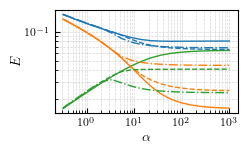

In [41]:

IMG_DIRECTORY = "./Assets/powerlaw"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# width = 1.5 * 458.63788

multiplier = 1.25 
width = multiplier * 487.8225
width = 487.8225
# multiplier = 1.25
# width = multiplier * 1.5 * 234.8775

plt.style.use("../latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = (2.375,1.4)

multiplier = 0.9
second_multiplier = 0.7


# import Line2D for custom legend
from matplotlib.lines import Line2D

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    sharey=True,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0,"wspace": 0},
)


# ICML adjustments
fig.subplots_adjust(left=0.2)
# fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(right=0.97)
# plt.subplots_adjust(bottom=0.30)



# Create a custom legend
custom_legend = []

linestyles = ["solid", "dashed", "dashdot", "dotted"]

data_dic = {}

for epsilon_idx, epsilon in enumerate(epsilons):

    # ax = axes[epsilon_idx]
    ax = axes

    if not epsilon in [0.0, 0.1, 0.2]:
        continue


    for df_idx, (key, value) in enumerate(df_dict.items()):

        beta = key


        eps_dict = value[epsilon]

        if beta == 0.5 or beta > 1.5:
            continue

        alphas = eps_dict["alphas"]
        adversarial_error = eps_dict["adversarial_error"]
        generalization_error = eps_dict["generalization_error"]
        boundary_error = eps_dict["boundary_error"]
        class_preserving = eps_dict["class_preserving"]

        adversarial_error_erm = eps_dict["adversarial_error_erm"]
        generalization_error_erm = eps_dict["generalization_error_erm"]
        boundary_error_erm = eps_dict["boundary_error_erm"]
        class_preserving_erm = eps_dict["class_preserving_erm"]

        adversarial_error_erm_std = eps_dict["adversarial_error_erm_std"]
        generalization_error_erm_std = eps_dict["generalization_error_erm_std"]
        boundary_error_erm_std = eps_dict["boundary_error_erm_std"]
        class_preserving_erm_std = eps_dict["class_preserving_erm_std"]

        print(df_idx, epsilon)
        # data_dic_eps = {epsilon: {"adversarial_error": adversarial_error, "generalization_error": generalization_error, "boundary_error": boundary_error, "alpha": alphas}}
        data_dic.update({epsilon : {"adversarial_error": adversarial_error, "generalization_error": generalization_error, "boundary_error": boundary_error, "alpha": alphas}})
        
        adversarial_lines = ax.plot(alphas, adversarial_error, linestyle=linestyles[epsilon_idx],color="C0")
        ax.plot(alphas, generalization_error, linestyle=linestyles[epsilon_idx],color="C1")
        ax.plot(alphas, boundary_error,linestyle=linestyles[epsilon_idx], color="C2")
        # ax.plot(alphas, class_preserving,linestyle=linestyles[df_idx], color="C3")

        custom_legend.append(Line2D([0],[0],color="C0", linestyle=linestyles[df_idx]))
        custom_legend.append(Line2D([0],[0],color="C1", linestyle=linestyles[df_idx]))
        custom_legend.append(Line2D([0],[0],color="C2", linestyle=linestyles[df_idx]))
        # custom_legend.append(Line2D([0],[0],color="C3", linestyle=linestyles[df_idx]))

        ax.errorbar(
            alphas,
            adversarial_error_erm,
            yerr=adversarial_error_erm_std,
            fmt=".",
            markersize=1,
            color="C0"
        )
        ax.errorbar(
            alphas,
            generalization_error_erm,
            yerr=generalization_error_erm_std,
            fmt=".",
            markersize=1,
            color="C1"
        )
        ax.errorbar(
            alphas,
            boundary_error_erm,
            yerr=boundary_error_erm_std,
            fmt=".",
            markersize=1,
            color="C2"
        )
        # axs.errorbar(
        #     alphas,
        #     class_preserving_erm,
        #     yerr=class_preserving_erm_std,
        #     fmt=".",
        #     markersize=1,
        #     color="C3"
        # )

    # ax.legend(title=f"$\\beta={1.5}$")
    # Set the major ticks to face inwards
    ax.tick_params(axis='both', which='major', direction='in')

    # Set the minor ticks to face inwards
    ax.tick_params(axis='both', which='minor', direction='in')


axes.set_xscale("log")
axes.set_yscale("log")


axes.set_ylabel(r"$E$", labelpad=2.0)
# axes.set_ylabel(r"$E$", labelpad=2.0)



axes.set_xlabel(r"$\alpha$", labelpad=2.0)
axes.grid(which="both", axis="both", alpha=0.5)



error_legend = []

error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{adv}}$",color="C0"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{gen}}$",color="C1"))
error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{bound}}$",color="C2"))
# error_legend.append(Line2D([0],[0],label=r"$E_{\mathrm{CP}}$",color="C3"))

epsilon_legend = []

for idx, (beta, value) in enumerate(df_dict.items()):
    epsilon_legend.append(Line2D([0],[0],color="black", linestyle=linestyles[idx], label=r"$\beta={}$".format(beta))) 


custom_legend = []

# mix the two legends
for idx in range(len(error_legend)):
    
    # custom_legend.append(epsilon_legend[idx+1])
    custom_legend.append(error_legend[idx])

# custom_legend.append(epsilon_legend[-1])

# Place the legend at the bottom of the figure
# fig.legend(handles=custom_legend, loc='upper center', ncol=3, handlelength=1)

save = True
if save:
    save_plot(
        fig,
        f"powerlaw",
    )

plt.show()




In [43]:
data_dic.keys()

with open("powerlaw_alpha_sweep.pkl", "wb") as f:
    pickle.dump(data_dic, f)